In [7]:
# Import built-in and third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings

In [8]:
# Import user-defined modules
def find_dir(dir, root=os.path.abspath('/')):
   
    cd=os.getcwd() 
    while True:
        listdir=os.listdir(cd)
        if dir in listdir:
            return cd
        elif (os.path.basename(cd)==root) or (cd==os.path.abspath('/')):
            return None
        cd=os.path.dirname(cd)


# Load user-defined utilities
import fleishman as uflsh
import format as ufrmt
import multivariate as umvar
import plottingok as uplot
import utilslab as u

In [9]:
# Warnings
# warnings.simplefilter('ignore')
warnings.simplefilter('default')

# Set Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option ('display.max_rows', 40)
pd.set_option('display.float_format', '{:f}'.format)

# Set aspects of the visual theme for all matplotlib and seaborn plots
sns.set_theme()

In [10]:
# Load radiomics dataset
dataset_dirpath = './'
dataset_filename = 'radiogenomics.csv'
dataset_filepath = os.path.join(dataset_dirpath, dataset_filename)

df = pd.read_csv(  
      filepath_or_buffer=dataset_filepath
    , sep=','
    , on_bad_lines='warn'
    , index_col=False
    , header=0
)

In [11]:
columns = ['id', 'Histology', 'Recurrence']
df.drop(columns=columns, inplace=True)

In [12]:
df.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Hist_binary
0,0.694965,0.481237,8.963171,18.625263,20.000000,19.697716,17.262677,23.345235,1294.708333,12.943898,0.648684,885.588414,0.684006,1323,-2.058225,0.508785,1511.575170,0.976329,1.783631,1.872169,0.513958,0.918026,-0.308155,0.473524,-2.060159,2.574118,0.789137,1.068895,-0.768836,1511.575170,0.516317,1.047577,2.370868,0.678778,-0.025348,0.677123,0.321736,0.355941,0.321736,0.897241,0.215574,0.839132,0.839132,0.935653,0.892755,-0.102377,0.409092,0.321736,1.510579,

In [13]:
# Save features in dataframe X, and target in series y
target = 'Hist_binary'

X = df.drop(columns=target).copy()
y = df[target].copy()

cond = df[target] == 0
X

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.694965,0.481237,8.963171,18.625263,20.000000,19.697716,17.262677,23.345235,1294.708333,12.943898,0.648684,885.588414,0.684006,1323,-2.058225,0.508785,1511.575170,0.976329,1.783631,1.872169,0.513958,0.918026,-0.308155,0.473524,-2.060159,2.574118,0.789137,1.068895,-0.768836,1511.575170,0.516317,1.047577,2.370868,0.678778,-0.025348,0.677123,0.321736,0.355941,0.321736,0.897241,0.215574,0.839132,0.839132,0.935653,0.892755,-0.102377,0.409092,0.321736,1.510579,0.284997,1.8

In [14]:
# Pre-processing
# Save minimum and maximum values for each feature
min_max_feat = X.describe().loc[['min', 'max']]
min_max_feat

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
min,0.356903,0.243226,7.602185,11.023599,13.601471,13.453624,12.369317,14.247807,723.125000,10.230319,0.303034,490.727891,0.118848,737.000000,-2.621761,0.155953,210.124842,0.023354,0.008435,1.149592,0.400795,0.010069,-1.541032,-2.200592,-2.930270,1.998086,0.003546,0.409919,-24.252773,210.124842,0.500034,0.004313,1.194424,0.009115,-0.557849,0.005962,0.004900,0.100107,0.004900,0.044492,0.004875,0.839132,0.839132,0.935653,0.892755,-0.508482,0.034625,0.004900,1.080925,0.284

In [15]:
X_norm = u.normalize(X)

In [16]:
X_norm.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.00

In [17]:
X.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.703530,0.130560,-0.221554,0.012621,-0.088512,-0.007204,-0.109864,0.115217,0.158775,0.281431,0.054783,-0.157536,0.115116,0.004645,-0.175770,0.109382,-0.079183,0.030558,0.098059,-0.097578,-0.012935,-0.104459,-0.111323,-0.059658,0.048514,0.005418,0.075192,-0.043077,0.109382,0.077712,-0.003407,-0.084346,-0.106874,0.126187,-0.114837,-0.057262,-0.090373,-0.057262,-0.076897,-0.069391,0.057262,0.057262,0.057262,0.057262,0.043125,-0.114804,-0

In [18]:
high_corr_thrsh=0.95

melt_corr_df = u.melt_corr(X)
filtered_df = melt_corr_df.loc[np.abs(melt_corr_df['corr_coeff'])>high_corr_thrsh]
filtered_df

,feat_1,feat_2,corr_coeff
316,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterRow,0.961812
420,original_shape_Maximum2DDiameterColumn,original_shape_Maximum3DDiameter,0.956367
824,original_shape_MeshVolume,original_shape_VoxelVolume,1.000000
871,original_shape_MeshVolume,original_gldm_GrayLevelNonUniformity,0.982275
1169,original_shape_SurfaceArea,original_glrlm_GrayLevelNonUniformity,0.979293
...,...,...,...
5481,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,-1.000000
5521,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LowGrayLevelZoneEmphasis,-1.000000
5545,original_glszm_LargeAreaEmphasis,original_glszm_ZoneVariance,0.997437
5667,original_ngtdm_Coarseness,original_ngtdm_Strength,0.999880


In [19]:
# Assumo che sono in ordine tutte le correlazioni (non g -- a, ma a -- g) --> chiedi lorenzo
lista_feat = []

In [20]:
for i in range(len(filtered_df)):
    if filtered_df.iat[i, 0] not in lista_feat:
        lista_feat.append(filtered_df.iat[i, 0])
lista_feat

['original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_MeshVolume',
 'original_shape_SurfaceArea',
 'original_shape_VoxelVolume',
 'original_firstorder_10Percentile',
 'original_firstorder_Energy',
 'original_firstorder_Entropy',
 'original_firstorder_InterquartileRange',
 'original_firstorder_Kurtosis',
 'original_firstorder_MeanAbsoluteDeviation',
 'original_firstorder_Mean',
 'original_firstorder_Minimum',
 'original_firstorder_RobustMeanAbsoluteDeviation',
 'original_firstorder_TotalEnergy',
 'original_firstorder_Uniformity',
 'original_glcm_Autocorrelation',
 'original_glcm_ClusterTendency',
 'original_glcm_Contrast',
 'original_glcm_Correlation',
 'original_glcm_DifferenceAverage',
 'original_glcm_DifferenceEntropy',
 'original_glcm_DifferenceVariance',
 'original_glcm_Id',
 'original_glcm_Idm',
 'original_glcm_Idmn',
 'original_glcm_Idn',
 'original_glcm_Imc1',
 'original_glcm_InverseVariance',
 'original_glcm_JointAverage',
 'original_glc

In [21]:
X.drop(columns=lista_feat, inplace=True)
X

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_glcm_MCC,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.694965,0.481237,8.963171,19.697716,17.262677,23.345235,12.943898,0.648684,0.684006,0.508785,0.513958,0.473524,2.574118,1.068895,-0.768836,1.047577,0.678778,-0.025348,0.409092,0.355941,5.295078,66.200302,0.050038,30.946873,683.087680,0.241841,603.638700,163.664210,0.557256,0.032456,0.004976,0.219134,18.761785,0.493529,2.967303,195.966011,0.467062,2.446712,1.807652,0.238556,0.240000,542767.600000,88800.850000,0.550000,1.400000,0.280000,0.450001,1.200002,0.262501,2.321928,0.003779,109581.040000,132.498906,0.073420,0.004980
1,0.732610,0.656833,12.548555,24.698178,20.518285,24.779023,13.996240,0.704976,0.526887,0.387717,0.400795,-0.305450,3.331065,1.209699,-0.653192,1.075648,0.694786,0.271356,0.394095,0.347533,5.081770,105.286482,0.047129,44.406488,1137.957028,0.245310,489.820949,262.068039,0.676365,0.030916,0.004301,0.232907,18.995670,0.527321,3.059661,287.269255,0.414469,4.805550,1.815440,0.237144,0.109375,656680.500000,230054.250000,0.343750,2.000000,0.250000,0.451389,1.805556,0.112847,2.155639,0.003581,237398.937500,559.922433,0.073348,0.002994
2,0.720221,0.657195,11.036269,20.396078,20.248457,21.908902,12.094665,0.741714,0.577913,0.436055,0.470867,-1.255896,2.795833,1.482543,0.281601,0.983137,0.527083,0.324180,0.282672,0.271205,4.472588,106.327835,0.073078,60.782751,963.665292,0.168844,429.610997,386.386770,0.838660,0.043098,0.005038,0.249463,21.052801,0.626081,3.076713,135.098864,0.335289,7.701360,1.777853,0.213045,0.098765,182135.111100,147233.861100,0.333333,2.333333,0.259259,0.485063,1.940252,0.121266,2.281036,0.006186,128078.000000,202.513315,0.036734,0.006318
3,0.624517,0.387075,8.513651,24.207437,18.867962,25.514702,13.736166,0.564827,0.775931,0.524183,0.546346,-0.996245,2.498024,1.262871,0.216973,0.921414,0.720432,0.412172,0.412451,0.384604,5.060750,59.240350,0.043147,54.044600,801.929352,0.207965,410.911872,305.275492,0.778769,0.051722,0.006158,0.249202,15.760823,0.613195,3.041275,161.941915,0.403720,4.735983,1.711971,0.243671,0.098765,169391.555600,108193.638900,0.333333,2.333333,0.259259,0.485226,1.940905,0.121307,2.281036,0.006555,97160.024690,654.46615

In [22]:
X_norm = u.normalize(X)

In [23]:
X_norm.describe()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_glcm_MCC,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.669838,0.577368,0.210988,0.255872,0.279938,0.273835,0.224839,0.545865,0.407830,0.726636,0.510181,0.762244,0.470122,0.430812,0.877857,0.484549,0.680010,0.464043,0.641558,0.590228,0.717006,0.035828,0.151253,0.380393,0.061309,0.736519,0.343740,0.329391,0.467428,0.290652,0.416047,0.808166,0.087310,0.559561,0.421989,0.067153,0.482434,0.088404,0.562421,0.599758,0.632139,0.037867,0.074438,0.442413,0.049159,0.416207,0.566193,0.431040,0.411331,0.507389,0.205002,0.052272,0.052650,0.479780,0.027610
std,0.211640,0.211953,0.181276,0.204220,0.203739,0.207318,0.188486,0.218991,0.204376,0.133877,0.192429,0.268016,0.136670,0.236496,0.112229,0.234357,0.200807,0.286004,0.206484,0.205863,0.234326,0.108518,0.209419,0.189224,0.133106,0.289726,0.250834,0.239700,0.274312,0.214212,0.205540,0.203573,0.120327,0.202254,0.206784,0.120116,0.222033,0.142022,0.214905,0.200710,0.314657,0.090938,0.143136,0.301240,0.143989,0.223755,0.271139,0.283271,0.240865,0.231979,0.165362,0.106110,0.145357,0.283572,0.091816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [24]:
X.corr()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_glcm_MCC,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Elongation,1.000000,0.703530,0.130560,-0.088512,-0.007204,-0.109864,0.158775,0.281431,-0.157536,-0.175770,-0.097578,-0.111323,0.048514,0.075192,-0.043077,-0.003407,-0.106874,0.126187,-0.114804,-0.090207,-0.172385,0.120735,0.143771,-0.007265,0.131537,-0.077712,-0.014091,0.146551,0.097360,0.052082,-0.059365,-0.001015,0.113964,0.039858,0.071199,0.073512,-0.127114,0.148866,0.028666,-0.084429,-0.172372,0.066752,0.094419,-0.113014,0.134681,0.147656,0.038860,0.083195,-0.063073,-0.114782,0.095065,0.089393,-0.077835,-0.044765,0.097629
original_shape_Flatness,0.703530,1.000000,0.255202,-0.092249,-0.078464,-0.146554,0.063303,0.476958,-0.254348,-0.198726,-0.083362,-0.276405,0.075908,0.266026,0.102682,0.119131,-0.017095,0.241813,-0.036395,-0.008205,-0.221424,0.221846,0.223048,0.029533,0.192624,-0.033270,-0.113236,0.317485,0.244451,0.071462,-0.049934,0.120137,0.119233,0.161225,0.118982,0.052243,-0.186949,0.266830,0.067427,-0.110766,-0.195764,0.092185,0.195521,-0.242897,0.192210,0.255258,0.101207,0.185831,-0.110960,-0.192393,0.159124,0.152143,0.025197,-0.040478,-0.002036
original_shape_LeastAxisLength,0.130560,0.255202,1.000000,0.890430,0.848742,0.822262,0.943510,-0.391713,-0.824674,-0.157936,0.054794,-0.419208,0.039530,0.449834,0.267881,0.254618,0.259468,0.314209,0.362409,0.458352,-0.353943,0.762362,0.529578,-0.022383,0.866544,0.048729,-0.024471,0.636628,0.399567,-0.054420,-0.069733,0.339284,0.369252,0.393368,0.744325,0.797506,-0.630514,0.771647,-0.151251,0.006945,-0.332344,0.403751,0.838493,-0.318732,0.780194,0.053661,0.511851,0.489484,0.217223,0.423587,0.160841,0.673994,0.437156,-0.198807,-0.226091
original_shape_Maximum2DDiameterRow,-0.088512,-0.092249,0.890430,1.000000,0.898858,0.904332,0.931755,-0.628910,-0.725953,-0.083009,0.091128,-0.299759,0.021457,0.374987,0.262915,0.276751,0.306488,0.231467,0.432740,0.500872,-0.207429,0.610525,0.387771,0.020692,0.741151,0.130097,-0.013455,0.528704,0.330342,-0.047473,-0.015982,0.326157,0.268495,0.353185,0.687670,0.766604,-0.535008,0.607202,-0.140497,0.065800,-0.230086,0.334159,0.714625,-0.272097,0.668948,-0.003238,0.522011,0.

In [25]:
melt_corr_df = u.melt_corr(X)
filtered_df2 = melt_corr_df.loc[np.abs(melt_corr_df['corr_coeff'])>high_corr_thrsh]
filtered_df2

,feat_1,feat_2,corr_coeff


In [26]:
target='Hist_binary'

target_corr_df=df.corr()[[target]].iloc[:-1].sort_values(by=target, ascending=False)
target_corr_df

,Hist_binary
original_gldm_SmallDependenceHighGrayLevelEmphasis,0.306653
original_gldm_SmallDependenceEmphasis,0.302281
original_gldm_LowGrayLevelEmphasis,0.297383
original_glszm_HighGrayLevelZoneEmphasis,0.295807
original_glcm_ClusterShade,0.293627
...,...
original_glszm_LowGrayLevelZoneEmphasis,-0.295807
original_gldm_HighGrayLevelEmphasis,-0.297383
original_glcm_SumAverage,-0.299660
original_glcm_JointAverage,-0.299660


In [27]:
low_corr_thrsh=0.01

target_corr_df.loc[np.abs(target_corr_df['Hist_binary'])<low_corr_thrsh]

,Hist_binary
original_gldm_DependenceNonUniformity,0.007255
original_shape_SurfaceVolumeRatio,-0.005967
original_shape_Elongation,-0.006601
original_glcm_Correlation,-0.007503
original_glcm_MCC,-0.007740


In [28]:
lista_low = ['original_gldm_DependenceNonUniformity', 'original_shape_SurfaceVolumeRatio', 'original_shape_Elongation', 'original_glcm_MCC']
lista_low

['original_gldm_DependenceNonUniformity',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_Elongation',
 'original_glcm_MCC']

In [29]:
len(lista_low)

4

In [30]:
X.drop(columns=lista_low, inplace=True)
X

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
0,0.481237,8.963171,19.697716,17.262677,23.345235,12.943898,0.648684,0.508785,0.513958,0.473524,2.574118,1.068895,-0.768836,1.047577,0.678778,-0.025348,0.409092,5.295078,0.050038,30.946873,683.087680,0.241841,603.638700,163.664210,0.557256,0.032456,0.004976,0.219134,18.761785,0.493529,2.967303,195.966011,0.467062,2.446712,1.807652,0.238556,0.240000,542767.600000,88800.850000,0.550000,1.400000,0.280000,0.450001,1.200002,0.262501,2.321928,0.003779,109581.040000,132.498906,0.073420,0.004980
1,0.656833,12.548555,24.698178,20.518285,24.779023,13.996240,0.704976,0.387717,0.400795,-0.305450,3.331065,1.209699,-0.653192,1.075648,0.694786,0.271356,0.394095,5.081770,0.047129,44.406488,1137.957028,0.245310,489.820949,262.068039,0.676365,0.030916,0.004301,0.232907,18.995670,0.527321,3.059661,287.269255,0.414469,4.805550,1.815440,0.237144,0.109375,656680.500000,230054.250000,0.343750,2.000000,0.250000,0.451389,1.805556,0.112847,2.155639,0.003581,237398.937500,559.922433,0.073348,0.002994
2,0.657195,11.036269,20.396078,20.248457,21.908902,12.094665,0.741714,0.436055,0.470867,-1.255896,2.795833,1.482543,0.281601,0.983137,0.527083,0.324180,0.282672,4.472588,0.073078,60.782751,963.665292,0.168844,429.610997,386.386770,0.838660,0.043098,0.005038,0.249463,21.052801,0.626081,3.076713,135.098864,0.335289,7.701360,1.777853,0.213045,0.098765,182135.111100,147233.861100,0.333333,2.333333,0.259259,0.485063,1.940252,0.121266,2.281036,0.006186,128078.000000,202.513315,0.036734,0.006318
3,0.387075,8.513651,24.207437,18.867962,25.514702,13.736166,0.564827,0.524183,0.546346,-0.996245,2.498024,1.262871,0.216973,0.921414,0.720432,0.412172,0.412451,5.060750,0.043147,54.044600,801.929352,0.207965,410.911872,305.275492,0.778769,0.051722,0.006158,0.249202,15.760823,0.613195,3.041275,161.941915,0.403720,4.735983,1.711971,0.243671,0.098765,169391.555600,108193.638900,0.333333,2.333333,0.259259,0.485226,1.940905,0.121307,2.281036,0.006555,97160.024690,654.466154,0.048250,0.006278
4,0.671483,18.349358,28.442925,32.557641,34.234486,21.467688,0.691737,0.580399,0.586389,-0.980267,2.370904,1.223480,0.275030,0.933264,0.589778,0.294604,0.249299,4.998630,0.044581,46.526065,3996.888780,0.219359,433.500492,302.053012,0.756284,0.039

In [31]:
X_norm = u.normalize(X)

In [32]:
X_norm.describe()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.577368,0.210988,0.255872,0.279938,0.273835,0.224839,0.545865,0.726636,0.510181,0.762244,0.470122,0.430812,0.877857,0.484549,0.680010,0.464043,0.641558,0.717006,0.151253,0.380393,0.061309,0.736519,0.343740,0.329391,0.467428,0.290652,0.416047,0.808166,0.087310,0.559561,0.421989,0.067153,0.482434,0.088404,0.562421,0.599758,0.632139,0.037867,0.074438,0.442413,0.049159,0.416207,0.566193,0.431040,0.411331,0.507389,0.205002,0.052272,0.052650,0.479780,0.027610
std,0.211953,0.181276,0.204220,0.203739,0.207318,0.188486,0.218991,0.133877,0.192429,0.268016,0.136670,0.236496,0.112229,0.234357,0.200807,0.286004,0.206484,0.234326,0.209419,0.189224,0.133106,0.289726,0.250834,0.239700,0.274312,0.214212,0.205540,0.203573,0.120327,0.202254,0.206784,0.120116,0.222033,0.142022,0.214905,0.200710,0.314657,0.090938,0.143136,0.301240,0.143989,0.223755,0.271139,0.283271,0.240865,0.231979,0.165362,0.106110,0.145357,0.283572,0.091816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445263,0.092012,0.099757,0.127200,0.122818,0.089283,0.413820,0.663794,0.363377,0.646093,0.387433,0.233161,0.864623,0.318265,0.658108,0.214753,0.522762,0.646262,0.022500,0.247228,0.007024,0.572517,0.144788,0.129763,0.249995,0.122931,0.261141,0.732625,0.019898

In [33]:
X.corr()

,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxisLength,original_shape_Sphericity,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_Variance,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_Imc2,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelVariance,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelVariance,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength
original_shape_Flatness,1.000000,0.255202,-0.092249,-0.078464,-0.146554,0.063303,0.476958,-0.198726,-0.083362,-0.276405,0.075908,0.266026,0.102682,0.119131,-0.017095,0.241813,-0.036395,-0.221424,0.223048,0.029533,0.192624,-0.033270,-0.113236,0.317485,0.244451,0.071462,-0.049934,0.120137,0.119233,0.161225,0.118982,0.052243,-0.186949,0.266830,0.067427,-0.110766,-0.195764,0.092185,0.195521,-0.242897,0.192210,0.255258,0.101207,0.185831,-0.110960,-0.192393,0.159124,0.152143,0.025197,-0.040478,-0.002036
original_shape_LeastAxisLength,0.255202,1.000000,0.890430,0.848742,0.822262,0.943510,-0.391713,-0.157936,0.054794,-0.419208,0.039530,0.449834,0.267881,0.254618,0.259468,0.314209,0.362409,-0.353943,0.529578,-0.022383,0.866544,0.048729,-0.024471,0.636628,0.399567,-0.054420,-0.069733,0.339284,0.369252,0.393368,0.744325,0.797506,-0.630514,0.771647,-0.151251,0.006945,-0.332344,0.403751,0.838493,-0.318732,0.780194,0.053661,0.511851,0.489484,0.217223,0.423587,0.160841,0.673994,0.437156,-0.198807,-0.226091
original_shape_Maximum2DDiameterRow,-0.092249,0.890430,1.000000,0.898858,0.904332,0.931755,-0.628910,-0.083009,0.091128,-0.299759,0.021457,0.374987,0.262915,0.276751,0.306488,0.231467,0.432740,-0.207429,0.387771,0.020692,0.741151,0.130097,-0.013455,0.528704,0.330342,-0.047473,-0.015982,0.326157,0.268495,0.353185,0.687670,0.766604,-0.535008,0.607202,-0.140497,0.065800,-0.230086,0.334159,0.714625,-0.272097,0.668948,-0.003238,0.522011,0.466651,0.277795,0.516925,0.134588,0.571420,0.428802,-0.140035,-0.241398
original_shape_Maximum2DDiameterSlice,-0.078464,0.848742,0.898858,1.000000,0.922306,0.910226,-0.640935,-0.104756,0.060162,-0.252712,0.031356,0.328026,0.232210,0.241513,0.243963,0.204740,0.365725,-0.169780,0.331058,0.051802,0.686786,0.121987,-0.003593,0.477482,0.307454,-0.018744,0.029775,0.321129,0.262218,0.366553,0.648748,0.751001,-0.493245,0.537838,-0.146259,0.118558,-0.214536,0.330540,0.627826,-0.241438,0.610213,-0.041352,0.515991,0.442267,0.307433,0.566423,0.145702,0.529273,0.352733,-0.108435,-0.235980
original_shape_Maximum3DDiameter,-0.146554,0.822262,0.904332,0.922306,1.000000,0.880207,-0.649566,-0.075738,0.070931,-0.281648,0.029088,0.336645,0.244788,0.248474,0.265517,0.233607,0.372302,-0.

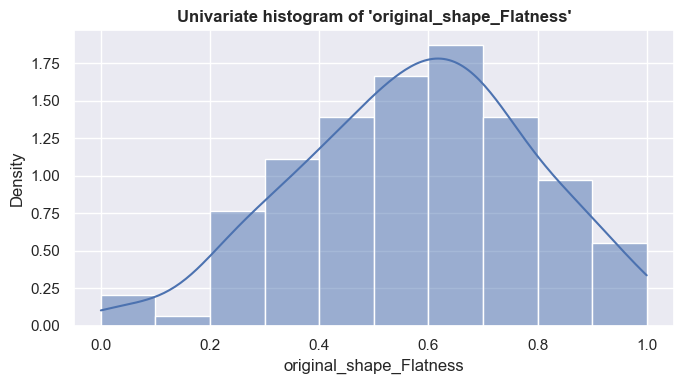

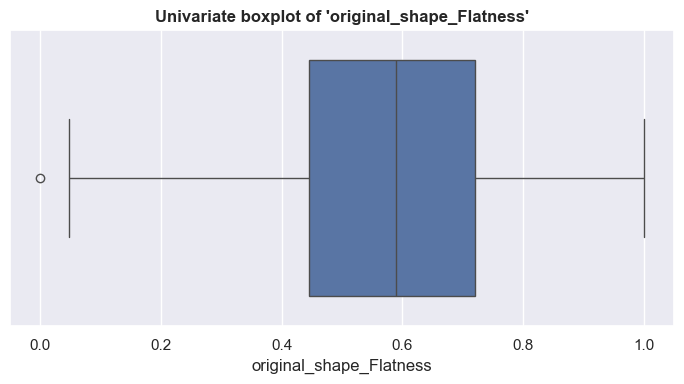

In [34]:
# Simulation
# Extract and visualize sample
feature = 'original_shape_Flatness'

uplot.histogram(data=X_norm, feature=feature, bins=10, kde=True)
uplot.boxplot(data=X_norm, feature=feature)

In [35]:
# Compute and print sample statistics
sample = X_norm[feature].values
sample_mvsk = umvar.mvsk(sample)

for key in sample_mvsk.keys():
    print(f'{key}:\t{np.round(sample_mvsk[key], 5)}')

mean:	0.57737
var:	0.04492
skew:	-0.24973
ekurt:	-0.26577


In [36]:
size = int(10e4) # This variable sets the size of the simulated sample

# Create an instance of the Fleishman class
ff = uflsh.Fleishman(
    mean=sample_mvsk['mean']
  , var=sample_mvsk['var']
  , skew=sample_mvsk['skew']
  , ekurt=sample_mvsk['ekurt']
  , size=size
  , verbose=1
)

In [37]:
# Generate the field
ff.gen_field()
fl_sample = ff.field

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 167
         Function evaluations: 301


In [38]:
# Store the generated sample into a DataFrame
X_fl = pd.DataFrame(fl_sample, columns=[feature])

# Print minimum and maximum value
print(X_fl.min().iloc[0])
print(X_fl.max().iloc[0])

-0.27180408421778723
1.0923496897141687


In [39]:
# Normalize generated data
X_fl_norm = u.normalize(X_fl)
X_fl_norm.describe()

,original_shape_Flatness
count,100000.000000
mean,0.621763
std,0.155858
min,0.000000
25%,0.516707
50%,0.628206
75%,0.734701
max,1.000000


In [40]:
# Extract the normalized values of the generated sample
fl_sample = X_fl_norm[feature].values
fl_sample

array([0.67854878, 0.45553328, 0.74670829, ..., 0.84923412, 0.60455705,
       0.73244218])

In [41]:
# Compute sample statistics of the normalized generated sample
fl_sample_mvsk = umvar.mvsk(fl_sample)
fl_sample_mvsk

{'mean': 0.6217628405515965,
 'var': 0.02429172447816303,
 'skew': -0.24647203883588933,
 'ekurt': -0.255692385691316}

In [42]:
# Compare statistics
print('\tOriginal\tSynthetic')
print('\t--------\t---------')
for key in sample_mvsk.keys():
    print(f'{key}\t{np.round(sample_mvsk[key], 5)} \t{np.round(fl_sample_mvsk[key], 5)}')

	Original	Synthetic
	--------	---------
mean	0.57737 	0.62176
var	0.04492 	0.02429
skew	-0.24973 	-0.24647
ekurt	-0.26577 	-0.25569


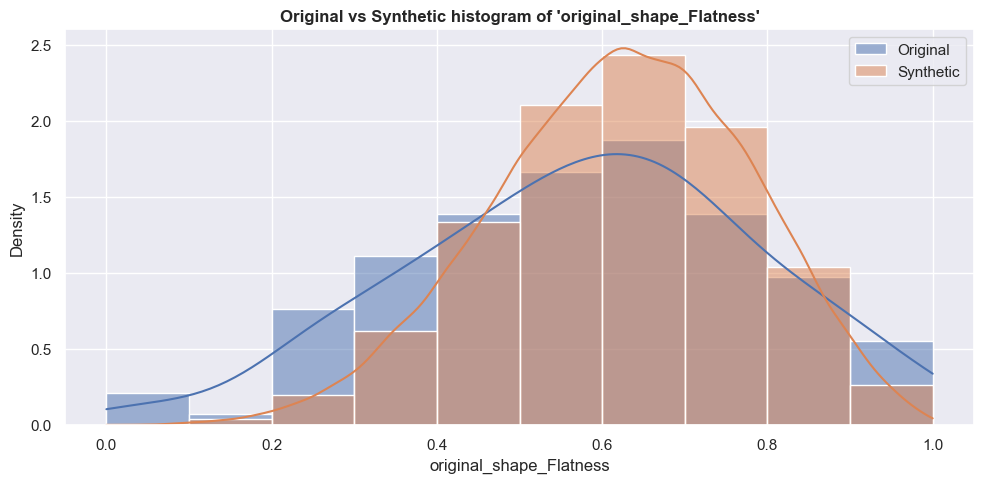

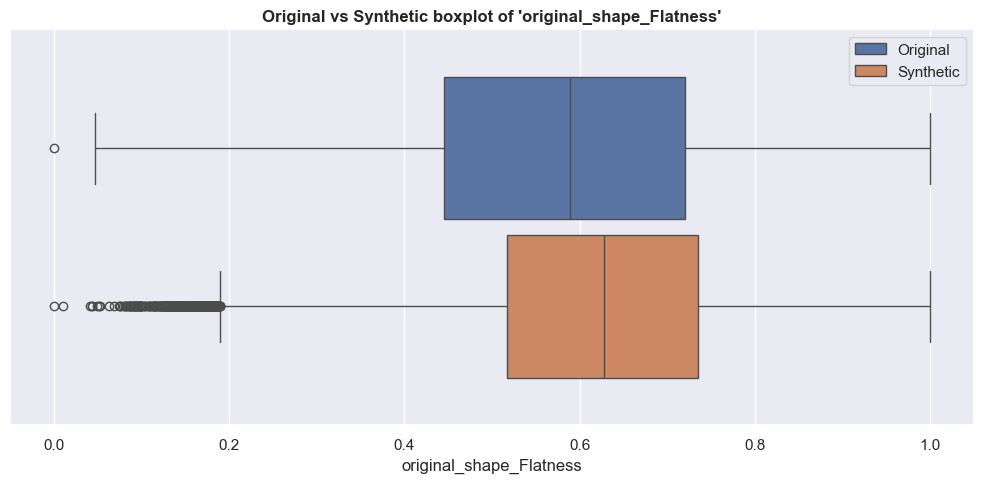

In [43]:
# Plot histograms and boxplots
uplot.sdg_histogram(
    data1=X_norm, data2=X_fl_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_norm, data2=X_fl_norm, 
    feature1=feature, feature2=feature)

In [44]:
# Simulate two correlated non-normal variables
# Extract sample values
features = ['original_shape_LeastAxisLength', 'original_shape_Flatness']

sample = ufrmt.to_array(X_norm[features])
n_var = X.shape[0]

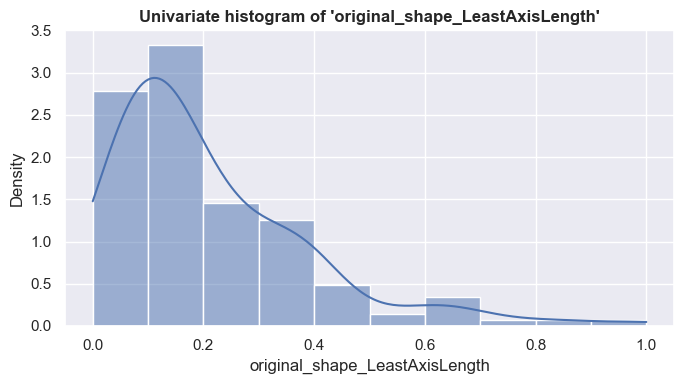

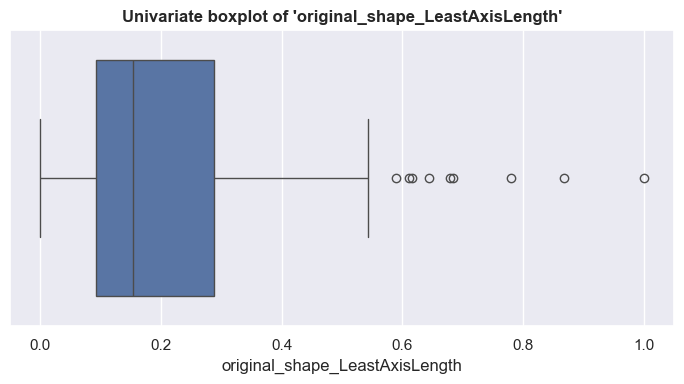

In [45]:
featureII = 'original_shape_LeastAxisLength'

uplot.histogram(data=X_norm, feature=featureII, bins=10, kde=True)
uplot.boxplot(data=X_norm, feature=featureII)

In [46]:
# Compute sample statistics
mean, cov, var, corr, skew, ekurt = umvar.mvsk(
    sample, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [47]:
# Simulate two correlated non-normal variables
size = int(10e4)

vm_sample = umvar.multivariate_non_normal(
    mean=mean
  , cov=cov
  , skew=skew
  , ekurt=ekurt
  , size=size
  , random_state=42
)

In [48]:
# Normalize synthetic sample
X_vm = pd.DataFrame(vm_sample.T, columns=features)
X_vm_norm = u.normalize(X_vm)
vm_sample = X_vm_norm[features].values.T

In [49]:
# Compute and compare sample statistics
umvar.mvsk_compare(X_norm[features], X_vm_norm, side_by_side=True)

mean                var            \
                               Original Synthetic Original Synthetic   
original_shape_LeastAxisLength 0.210988  0.096731 0.032861  0.011056   
original_shape_Flatness        0.577368  0.624883 0.044924  0.023703   

                                    skew               ekurt            
                                Original Synthetic  Original Synthetic  
original_shape_LeastAxisLength  1.676258  1.664539  3.399469  3.294167  
original_shape_Flatness        -0.249734 -0.243322 -0.265774 -0.281815

In [50]:
# Compute and compare correlation coefficients
rho = X_norm[features].corr().iloc[0, 1]
rho_vm = X_vm_norm.corr().iloc[0, 1]

print('\tOriginal\tSynthetic')
print('\t--------\t---------')
print(f'rho\t{np.round(rho, 5)} \t\t{np.round(rho_vm, 5)}')

	Original	Synthetic
	--------	---------
rho	0.2552 		0.25702


In [51]:
# Simulate all features
# Extract sample values
features = X_norm.columns.tolist()

sample = ufrmt.to_array(X_norm[features])
n_var = X.shape[0]

In [52]:
# Compute sample statistics
mean, cov, var, corr, skew, ekurt = umvar.mvsk(
    sample, ddof=1, bias=False, axis=1, 
    shrink_method='basic', shrinkage=1e-5, 
    to_tuple=True)

In [53]:
# Simulate all features
size = int(10e4)

vm_sample = umvar.multivariate_non_normal(
    mean=mean
  , cov=cov
  , skew=skew
  , ekurt=ekurt
  , size=size
  , random_state=42
)

/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.76
	vari: 0.07
	skew: -1.28
The value of [ekurt] must be >= [1.4854]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.88
	vari: 0.01
	skew: -4.20
The value of [ekurt] must be >= [26.9407]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.68
	vari: 0.04
	skew: -1.53
The value of [ekurt] must be >= [2.5649]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.46
	vari: 0.08
	skew: 0.09
The value of [ekurt] must be >= [-1.1197]
Using [ekurt] threshold value.
  warnings.warn(
/Users/gabriella/fleishman.py:169: UserWarning: For the Fleishman method to work with:
	mean: 0.72
	vari: 0.05
	skew: -1.29
The value of [ekurt] mu

In [54]:
# Normalize synthetic sample
X_vm = pd.DataFrame(vm_sample.T, columns=features)
X_vm_norm = u.normalize(X_vm)
vm_sample = X_vm_norm[features].values.T

In [55]:
pd.set_option('display.max_rows', None)
# Compute and compare sample statistics
matrice = umvar.mvsk_compare(X_norm[features], X_vm_norm, side_by_side=True)
matrice

mean            \
                                                   Original Synthetic   
original_shape_Flatness                            0.577368  0.633820   
original_shape_LeastAxisLength                     0.210988  0.103090   
original_shape_Maximum2DDiameterRow                0.255872  0.105165   
original_shape_Maximum2DDiameterSlice              0.279938  0.196141   
original_shape_Maximum3DDiameter                   0.273835  0.168695   
original_shape_MinorAxisLength                     0.224839  0.123148   
original_shape_Sphericity                          0.545865  0.571777   
original_firstorder_90Percentile                   0.726636  0.740482   
original_firstorder_Maximum                        0.510181  0.441818   
original_firstorder_Median                         0.762244  0.880120   
original_firstorder_Range                          0.470122  0.483601   
original_firstorder_RootMeanSquared                0.430812  0.380503   
original_firstorder_Skewness                       0.877857  0.820759   
original_firstorder_Variance                       0.484549  0.838740   
original_glcm_ClusterProminence                    0.680010  0.875536   
original_glcm_ClusterShade                         0.464043  0.575642   
original_glcm_Imc2                                 0.641558  0.761191   
original_gldm_DependenceEntropy                    0.717006  0.858184   
original_gldm_DependenceNonUniformityNormalized    0.151253  0.083020   
original_gldm_DependenceVariance                   0.380393  0.216089   
original_gldm_GrayLevelNonUniformity               0.061309  0.119828   
original_gldm_GrayLevelVariance                    0.736519  0.886898   
original_gldm_LargeDependenceHighGrayLevelEmphasis 0.343740  0.120272   
original_gldm_LargeDependenceLowGrayLevelEmphasis  0.329391  0.211457   
original_gldm_LowGrayLevelEmphasis                 0.467428  0.530227   
original_gldm_SmallDependenceHighGrayLevelEmphasis 0.290652  0.100840   
original_gldm_SmallDependenceLowGrayLevelEmphasis  0.416047  0.421166   
original_glrlm_GrayLevelVariance                   0.808166  0.926382   
original_glrlm_LongRunHighGrayLevelEmphasis        0.087310  0.097797   
original_glrlm_LowGrayLevelRunEmphasis             0.559561  0.712183   
original_glrlm_RunEntropy                          0.421989  0.359947   
original_glrlm_RunLengthNonUniformity              0.067153  0.206568   
original_glrlm_RunPercentage                       0.482434  0.550231   
original_glrlm_RunVariance                         0.088404  0.039935   
original_glrlm_ShortRunHighGrayLevelEmphasis       0.562421  0.589167   
original_glrlm_ShortRunLowGrayLevelEmphasis        0.599758  0.713036   
original_glszm_GrayLevelVariance                   0.632139  0.755735   
original_glszm_LargeAreaHighGrayLevelEmphasis      0.037867  0.328304   
original_glszm_LargeAreaLowGrayLevelEmphasis       0.074438  0.036761   
original_glszm_LowGrayLevelZoneEmphasis            0.442413  0.314127   
original_glszm_SizeZoneNonUniformity               0.049159  0.176586   
original_glszm_SizeZoneNonUniformityNormalized     0.416207  0.300293   
original_glszm_SmallAreaEmphasis                   0.566193  0.871043   
original_glszm_SmallAreaHighGrayLevelEmphasis      0.431040  0.471218   
original_glszm_SmallAreaLowGrayLevelEmphasis       0.411331  0.361882   
original_glszm_ZoneEntropy                         0.507389  0.727791   
original_glszm_ZonePercentage                      0.205002  0.140513   
original_glszm_ZoneVariance                        0.052272  0.263872   
original_ngtdm_Busyness                            0.052650  0.164566   
original_ngtdm_Contrast                            0.479780  0.727195   
original_ngtdm_Strength                            0.027610  0.209715   

                                                        var            \
                                                   Original Synthetic   
original_shape_Flatness                

In [128]:
media_real = []

for i in range (len(matrice)):
    media_real.append(matrice.iat[i, 0])  

In [126]:
media_syn = []

for i in range (len(matrice)):
    media_syn.append(matrice.iat[i, 1])  

In [149]:
err = []
err_rel = []

for i in range(len(matrice)):
    err.append(abs(media_real[i]-media_syn[i]))
    err_rel.append((abs(media_real[i]-media_syn[i])) / media_real[i])

errore_medio = sum(err)/len(err)
errore_rel_medio = sum(err_rel) / len(err_rel)
errore_medio, errore_rel_medio

(0.11588386274252466, 0.7528767431728964)

In [151]:
var_real = []
for i in range (len(matrice)):
    var_real.append(matrice.iat[i, 2])  

var_syn = []
for i in range (len(matrice)):
    var_syn.append(matrice.iat[i, 3])  

err_2 = []
err_rel_2 = []

for i in range(len(matrice)):
    err_2.append(abs(var_real[i]-var_syn[i]))
    err_rel_2.append((abs(var_real[i]-var_syn[i])) / var_real[i])

errore_medio_2 = sum(err_2)/len(err_2)
errore_rel_medio_2 = sum(err_rel_2) / len(err_rel_2)
errore_medio_2, errore_rel_medio_2

(0.02736880130180822, 0.6346026952339818)

In [153]:
sk_real = []
for i in range (len(matrice)):
    sk_real.append(matrice.iat[i, 4])  

sk_syn = []
for i in range (len(matrice)):
    sk_syn.append(matrice.iat[i, 5])  

err_3 = []
err_rel_3 = []

for i in range(len(matrice)):
    err_3.append(abs(sk_real[i]-sk_syn[i]))
    err_rel_3.append((abs(sk_real[i]-sk_syn[i])) / sk_real[i])

errore_medio_3 = sum(err_3)/len(err_3)
errore_rel_medio_3 = sum(err_rel_3) / len(err_rel_3)
errore_medio_3, errore_rel_medio_3

(0.2603990896513274, 0.032026499493397156)

In [161]:
kur_real = []
for i in range (len(matrice)):
    kur_real.append(matrice.iat[i, 6])  

kur_syn = []
for i in range (len(matrice)):
    kur_syn.append(matrice.iat[i, 7])  

err_4 = []
err_rel_4 = []

for i in range(len(matrice)):
    err_4.append(abs(kur_real[i]-kur_syn[i]))
    err_rel_4.append((abs(kur_real[i]-kur_syn[i]))/abs(kur_real[i]))

errore_medio_4 = sum(err_4)/len(err_4)
errore_rel_medio_4 = sum(err_rel_4) / len(err_rel_4)
errore_medio_4, errore_rel_medio_4

(9.66576437870272, 3.7221739905028186)

In [57]:
for name in matrice.axes[0].tolist():
    print(name) 

original_shape_Flatness
original_shape_LeastAxisLength
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_Maximum3DDiameter
original_shape_MinorAxisLength
original_shape_Sphericity
original_firstorder_90Percentile
original_firstorder_Maximum
original_firstorder_Median
original_firstorder_Range
original_firstorder_RootMeanSquared
original_firstorder_Skewness
original_firstorder_Variance
original_glcm_ClusterProminence
original_glcm_ClusterShade
original_glcm_Imc2
original_gldm_DependenceEntropy
original_gldm_DependenceNonUniformityNormalized
original_gldm_DependenceVariance
original_gldm_GrayLevelNonUniformity
original_gldm_GrayLevelVariance
original_gldm_LargeDependenceHighGrayLevelEmphasis
original_gldm_LargeDependenceLowGrayLevelEmphasis
original_gldm_LowGrayLevelEmphasis
original_gldm_SmallDependenceHighGrayLevelEmphasis
original_gldm_SmallDependenceLowGrayLevelEmphasis
original_glrlm_GrayLevelVariance
original_glrlm_LongRunHighGrayLevelEmphasis

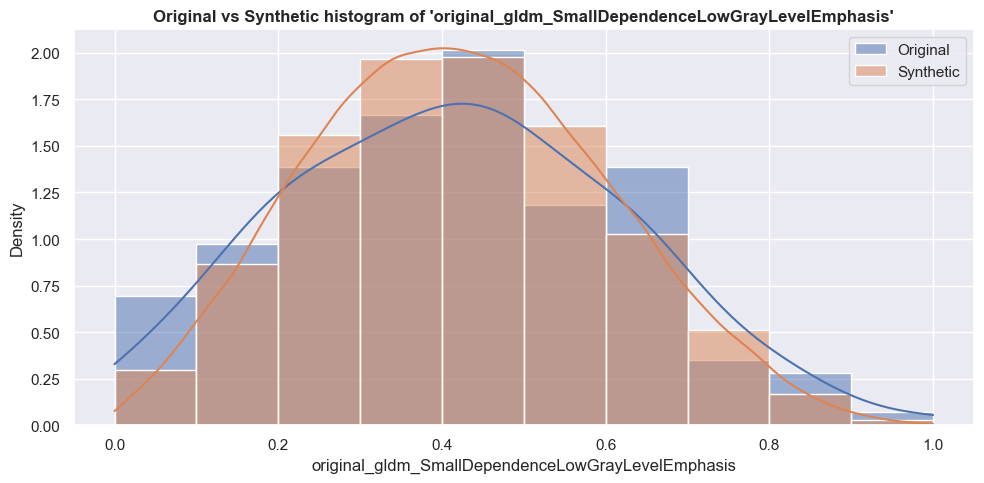

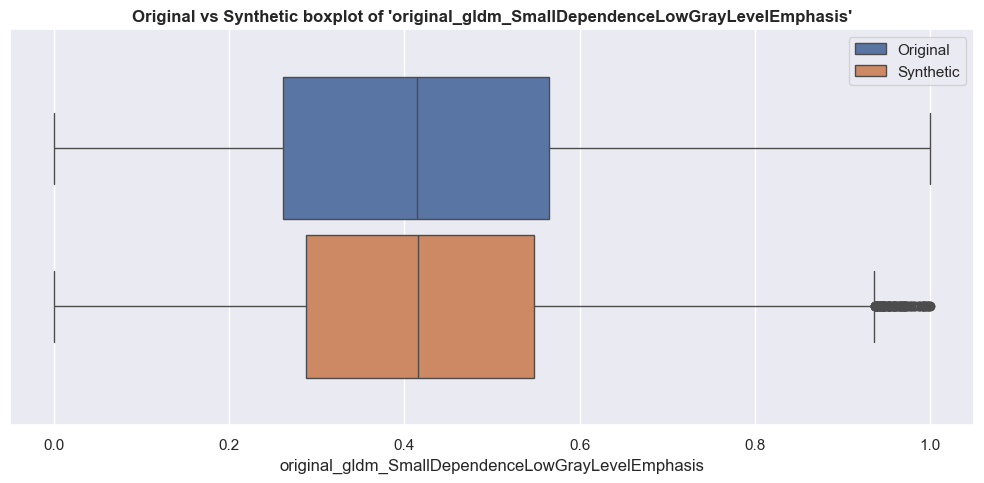

In [132]:
feature = 'original_gldm_SmallDependenceLowGrayLevelEmphasis'

uplot.sdg_histogram(
    data1=X_norm, data2=X_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_norm, data2=X_vm_norm, 
    feature1=feature, feature2=feature)

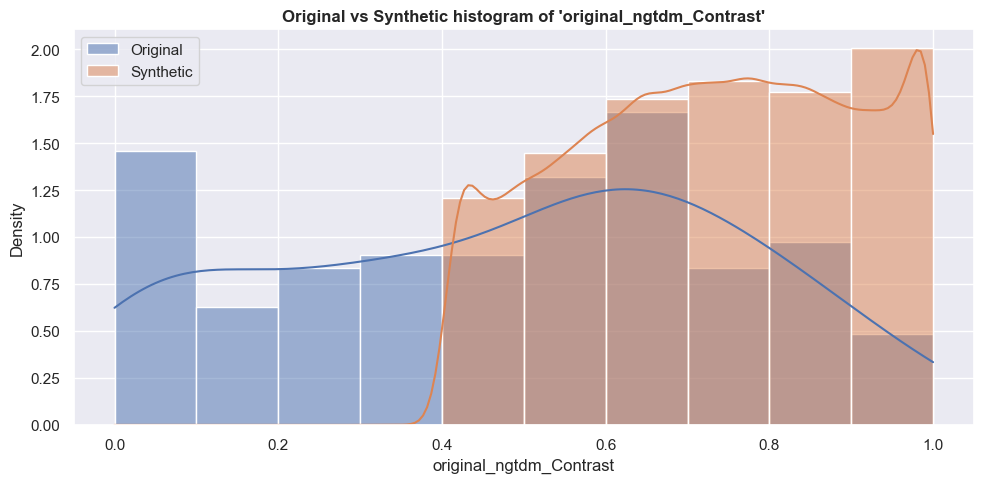

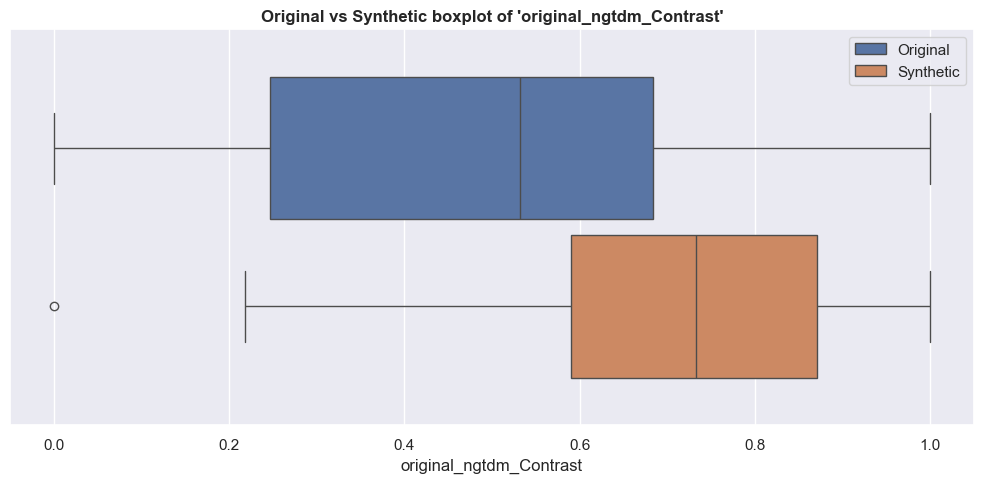

In [58]:
# Plot histograms and boxplots
feature = 'original_ngtdm_Contrast'

uplot.sdg_histogram(
    data1=X_norm, data2=X_vm_norm, 
    feature1=feature, feature2=feature, 
    dpi=100, bins=10, kde=True)

uplot.sdg_boxplot(
    data1=X_norm, data2=X_vm_norm, 
    feature1=feature, feature2=feature)

In [59]:
# Compare correlation coefficients
corr_compare = u.corr_compare(X_norm, X_vm_norm)
corr_compare

,feat_1,feat_2,corr_coeff,corr_coeff
0,original_shape_Flatness,original_shape_LeastAxisLength,0.255202,0.228242
1,original_shape_Flatness,original_shape_Maximum2DDiameterRow,-0.092249,-0.065838
2,original_shape_Flatness,original_shape_Maximum2DDiameterSlice,-0.078464,-0.056990
3,original_shape_Flatness,original_shape_Maximum3DDiameter,-0.146554,-0.126535
4,original_shape_Flatness,original_shape_MinorAxisLength,0.063303,0.080701
5,original_shape_Flatness,original_shape_Sphericity,0.476958,0.461682
6,original_shape_Flatness,original_firstorder_90Percentile,-0.198726,-0.199616
7,original_shape_Flatness,original_firstorder_Maximum,-0.083362,-0.076889
8,original_shape_Flatness,original_firstorder_Median,-0.276405,-0.255043
9,original_shape_Flatness,original_firstorder_Range,0.075908,0.080922


In [60]:
# Check one of the worst replicated correlations
cond = (corr_compare['feat_1'] == 'original_ngtdm_Contrast') \
     & (corr_compare['feat_2'] == 'original_ngtdm_Strength') 

corr_compare.loc[cond]

,feat_1,feat_2,corr_coeff,corr_coeff
1274,original_ngtdm_Contrast,original_ngtdm_Strength,-0.252852,-0.038667


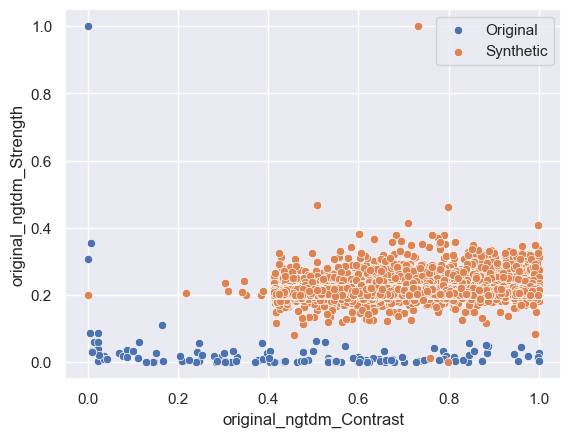

In [61]:
sns.scatterplot(data=X_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Original')
sns.scatterplot(data=X_vm_norm, x='original_ngtdm_Contrast', y='original_ngtdm_Strength', label='Synthetic')
plt.legend()
plt.show()